# <center>R3.08 - Probabilités <br>TP2 - Loi de probabilité discrètes<center>


_Tom Ferragut, Thibault Godin_

_IUT de Vannes, BUT Informatique_

In [4]:
import random
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, geom, randint, bernoulli

## 0 - Introduction

Nous avons étudié un ensemble de lois de probabilité usuelles :

- Loi uniforme
- Loi de Bernoulli
- Loi binomiale $\mathcal{B}(n,p)$
- Loi géométrique $\mathcal{G}(p)$
- Loi de Poisson $\mathcal{P}(\lambda)$

Ces lois peuvent être simulées grâce aux fonctions `pmf` ou `pdf` de la bibliothèque `scipy.stats` (`sps`). Cependant, nous allons tenter de recréer leur modélisation à partir de zéro.

## 1 - Modélisation des lois usuelles


### 1.1 - Bernoulli & Co.

>__Question 1 :__ 
>En utilisant la méthode `random.random()` (qui génère un nombre aléatoire entre 0 et 1), écrire une fonction `Bernoulli` prenant en entrée un paramètre $p$. Cette méthode doit renvoyer 1 avec une probabilité $p$ et $0$ avec une probabilité $(1-p)$.
>
>Comparer sa répartition (affichée dans une cellule ci-après) avec celle vue en cours.

In [37]:
# Fonction Bernoulli
def Bernoulli(p):
    nbAleatoire = random.random()
    if(nbAleatoire > p):
        return(1)
    else:
        return(0)

Bernoulli(0.5)

0

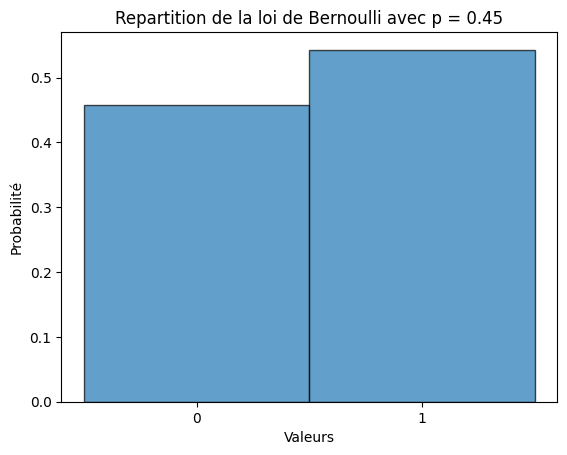

In [42]:
## Répartition de la méthode Bernoulli ##
# Simulation de la loi de Bernoulli pour p = 0.5

p = 0.45
n_simulations = 10000
results = [Bernoulli(p) for _ in range(n_simulations)]

# Affichage de la répartition
plt.hist(results, bins=[-0.5, 0.5, 1.5], density=True, edgecolor='black', alpha=0.7)
plt.xticks([0, 1])
plt.xlabel('Valeurs')
plt.ylabel('Probabilité')
plt.title(f'Repartition de la loi de Bernoulli avec p = {p}')
plt.show()

>__Question 2 :__ 
>En utilisant la fonction `Bernoulli` de la question 1, écrire une méthode `Binomiale` prenant en entrée un paramètre $p$ et un paramètre $n$. Cette méthode doit modéliser une loi binomiale $\mathcal{B}(n,p)$, renvoyant un entier entre $0$ et $n$ avec la probabilité correspondante.
>
>Comparer sa répartition (affichée dans une cellule ci-après) avec celle vue en cours.

In [54]:
# Fonction Binomiale
def Binomiale(n, p):
    x = 0

    for _ in range(n):
        x = x + Bernoulli(p)

    return(x)

Binomiale(10, 0.5)

5

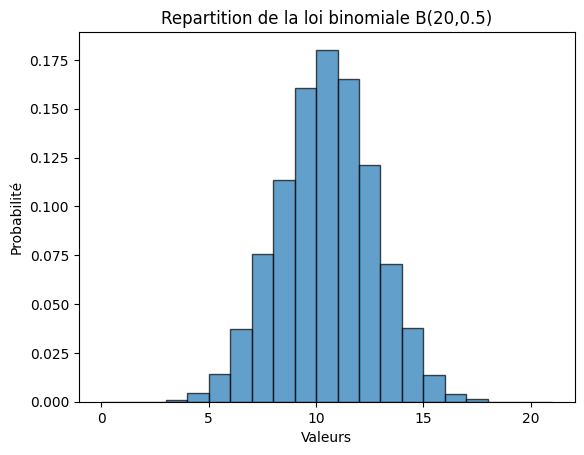

In [59]:
## Répartition de la méthode Binomiale ##
# Simulation de la loi binomiale pour n = 10, p = 0.5

n = 20
p = 0.5
results_binomiale = [Binomiale(n, p) for _ in range(n_simulations)]

# Affichage de la répartition
plt.hist(results_binomiale, bins=range(n + 2), density=True, edgecolor='black', alpha=0.7)
plt.xlabel('Valeurs')
plt.ylabel('Probabilité')
plt.title(f'Repartition de la loi binomiale B({n},{p})')
plt.show()

>__Question 3 :__ 
>En utilisant la fonction `Bernoulli`, écrire une méthode `Geometrique` prenant en entrée un paramètre $p$. Cette méthode doit modéliser une loi géométrique $\mathcal{G}(p)$, renvoyant un entier entre $1$ et $+\infty$ avec la probabilité correspondante. _(Il n'est pas facile de gérer une infinité de solution possible !)_
>
>Comparer sa répartition (affichée dans une cellule ci-après) avec celle vue en cours.

In [81]:
def Geometrique(p):    
    return(Bernoulli(p)*p)



In [82]:
## Répartition de la méthode Geometrique ##
# Simulation de la loi géométrique pour p = 0.3
p = 0.3
results_geometrique = [Geometrique(p) for _ in range(n_simulations)]

# Affichage de la répartition
plt.hist(results_geometrique, bins=range(1, max(results_geometrique) + 2), density=True, edgecolor='black', alpha=0.7)
plt.xlabel('Valeurs')
plt.ylabel('Probabilité')
plt.title(f'Repartition de la loi géométrique G({p})')
plt.show()

TypeError: 'float' object cannot be interpreted as an integer

>__Question 4 :__ 
>Pour les trois lois précédentes, trouver expérimentalement leur espérance. Ensuite, comparez-les aux résultats théoriques vus en cours.

In [13]:
n_simulations=1000

def Esperance_Bernoulli(n):
    

#Espereance Experimentale de la loi de Bernouilli : 0.3034 (theorique : 0.3)
#Espereance Experimentale de la loi Binomiale : 3.0276 (theorique : 3.0)
#Espereance Experimentale de la loi géometrique : 0.3352 (theorique : 3.3333333333333335)

Espérance expérimentale de la loi de Bernoulli : 0.3034 (théorique : 0.3)
Espérance expérimentale de la loi binomiale : 3.0276 (théorique : 3.0)
Espérance expérimentale de la loi géométrique : 3.3352 (théorique : 3.3333333333333335)


### 1.2 - Modéliser une loi de poisson $\mathcal{P}(\lambda)$.
Nous ne modéliserons pas _parfaitement_ une loi de Poisson $\mathcal{P}(\lambda)$, mais nous allons nous en approcher. Pour cela, nous allons utiliser une loi binomiale $\mathcal{B}(n, p)$. Une loi de Poisson peut être approximée par une loi binomiale lorsque $p $ est petit, c'est-à-dire lorsque l'occurrence d'un événement est rare.

>__Question 5 :__ 
> Calculer l'espérance et la variance de la loi binomiale $\mathcal{B}\left(n, \frac{\lambda}{n}\right)$. Que se passe-t-il quand $n \to +\infty$ ? En déduire une méthode `Poisson_approx` prenant en paramètres $n$ et $\lambda$ et qui simule une loi de Poisson approchée, de plus en plus précise quand $n \to +\infty$.

__Réponse__

Soit $X$ une variable aléatoire de loi $\mathcal{B}\left(n, \frac{\lambda}{n}\right)$.

- Espérance : $\mathbb{E}(X) = \cdots$
- Variance : $\text{Var}(X) = \cdots$


MemoryError: 

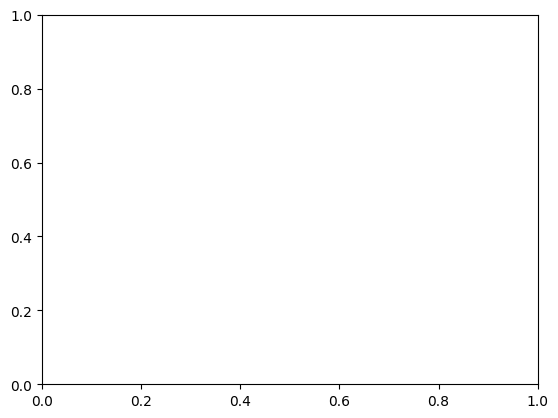

In [83]:
# Fonction Poisson_approx
def Poisson_approx(n, lambd):
#  e**(−λ) * (λk/k!)
    
    return (n)




# Paramètres
n = 2000  # Augmenter n pour améliorer l'approximation
lambd = 5  # Valeur de λ pour la loi de Poisson

# Simulation de la loi de Poisson approchée
results_poisson = [Poisson_approx(n, lambd) for _ in range(1000)]

# Affichage de la répartition
plt.hist(results_poisson, bins=range(0, max(results_poisson) + 1), density=True, edgecolor='black', alpha=0.7)
plt.xlabel('Valeurs')
plt.ylabel('Probabilité')
plt.title(f'Approximation de la loi de Poisson P({lambd}) avec n = {n}')
plt.show()


>__Question 6 (Bonus):__ Comparer, visuellement et expérimentalement, ce résultat à une vraie loi de Poisson de paramètre $\lambda$, comment estimer l'erreur ?

__Réponse à la Question 6__

#TODO


## 2- Loi Forte des Grands Nombres

Nous avons observé, pour trois lois usuelles finies, que la moyenne empirique est très proche de la moyenne théorique.<br> En fait, ce résultat se généralise au travers du __théorème de la Loi Forte des Grands Nombres__ (LFGN).

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
>**Théorème (LFGN) :**<br>
>
>Soit $X_i$ des v.a. indépendantes et de même loi (éventuellement inconnue) d'espérance $m$.<br />
>Alors, la moyenne empirique converge (presque sûrement) vers la moyenne théorique :
>$$\bar X_n=\displaystyle\frac{1}{n}\sum_{i=1}^{n}X_i\xrightarrow[n\to+\infty]{(p.s.)}m$$

*En pratique, on considère que la moyenne empirique (pour $n$ assez grand) est proche de la moyenne théorique*

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

>__Question 7 :__ Essayer d'illustrer ce théorème de la manière suivante, par exemple avec les $X_i$ des lois de Bernoulli de paramètre p=0.5. 
<img src="LFGN.png" width="400">

In [5]:
#TODO